In [99]:
import numpy as np
import pickle
import torch
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
with open('banana/res_nuts.pickle', 'rb') as handle:
    res_nuts = pickle.load(handle)
with open('banana/adaptive_isir.pickle', 'rb') as handle:
    res_adapt_isir = pickle.load(handle)
with open('banana/res_ex2.pickle', 'rb') as handle:
    res_ex2 = pickle.load(handle)
with open('banana/res_mala.pickle', 'rb') as handle:
    res_mala = pickle.load(handle)
with open('banana/res_flex.pickle', 'rb') as handle:
    res_flex = pickle.load(handle)

In [101]:
time_nuts = res_nuts["time"]
print("Time NUTS:")
print("dim = 10: ", np.asarray(time_nuts[::5]).mean())
print("dim = 20: ", np.asarray(time_nuts[1::5]).mean())
print("dim = 50: ", np.asarray(time_nuts[2::5]).mean())
print("dim = 100: ", np.asarray(time_nuts[3::5]).mean())
print("dim = 200: ", np.asarray(time_nuts[4::5]).mean())

Time NUTS:
dim = 10:  28.85704584598541
dim = 20:  32.52270017623901
dim = 50:  34.14822592258454
dim = 100:  35.70667333126068
dim = 200:  35.7805419254303


In [102]:
time_flex = res_flex["time"]
print("Time NUTS:")
print("dim = 10: ", np.asarray(time_flex[::5]).mean())
print("dim = 20: ", np.asarray(time_flex[1::5]).mean())
print("dim = 50: ", np.asarray(time_flex[2::5]).mean())
print("dim = 100: ", np.asarray(time_flex[3::5]).mean())
print("dim = 200: ", np.asarray(time_flex[4::5]).mean())

Time NUTS:
dim = 10:  39.344133367538454
dim = 20:  41.57745035648346
dim = 50:  43.33714374065399
dim = 100:  50.07716619968414
dim = 200:  61.88385598659515


In [103]:
time_adapt_isir = res_adapt_isir["time"]
print("Time NUTS:")
print("dim = 10: ", np.asarray(time_adapt_isir[::5]).mean())
print("dim = 20: ", np.asarray(time_adapt_isir[1::5]).mean())
print("dim = 50: ", np.asarray(time_adapt_isir[2::5]).mean())
print("dim = 100: ", np.asarray(time_adapt_isir[3::5]).mean())
print("dim = 200: ", np.asarray(time_adapt_isir[4::5]).mean())

Time NUTS:
dim = 10:  24.464101300239562
dim = 20:  26.620687985420226
dim = 50:  28.35443901538849
dim = 100:  35.162258768081664
dim = 200:  47.06315680027008


In [92]:
(np.asarray(res_adapt_isir["ess"]).flatten()[3::5]).mean()

0.38114735

In [93]:
(np.asarray(res_nuts["ess"]).flatten()[3::5]).mean()

0.27656162

In [94]:
(np.asarray(res_flex["ess"]).flatten()[3::5]).mean()

0.36762634

In [105]:
dims = [20,40,60,80,100]
major_xticks = dims

In [106]:
keywords = ["ess","tv","emd"]
av_nuts = {"ess":[],"tv":[],"emd":[]}
av_isir = {"ess":[],"tv":[],"emd":[]}
av_adapt_isir = {"ess":[],"tv":[],"emd":[]}
av_flex = {"ess":[],"tv":[],"emd":[]}
av_ex2 = {"ess":[],"tv":[],"emd":[]}

In [107]:
for i in range(len(dims)):
    for key in keywords:
        av_nuts[key].append(np.asarray(res_nuts[key]).flatten()[i::5].mean())
        av_isir[key].append(np.asarray(res_mala[key]).flatten()[i::5].mean())
        av_adapt_isir[key].append(np.asarray(res_adapt_isir[key]).flatten()[i::5].mean())
        av_flex[key].append(np.asarray(res_flex[key]).flatten()[i::5].mean())
        av_ex2[key].append(np.asarray(res_ex2[key]).flatten()[i::5].mean())

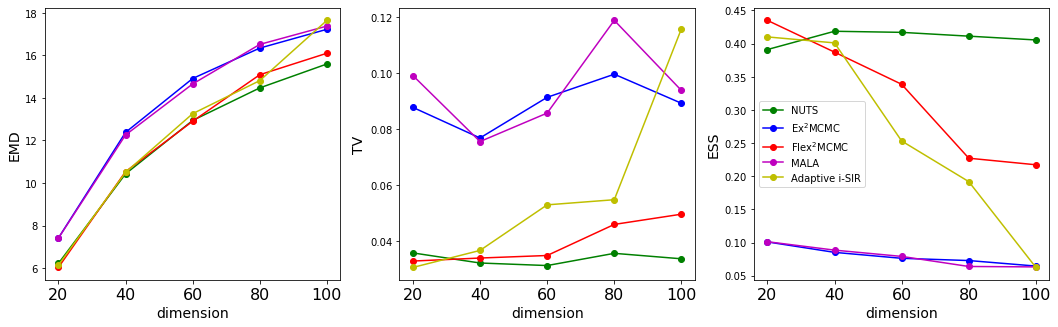

In [108]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
#i-sir plots
ax[0].plot(np.arange(len(dims)),np.asarray(av_nuts["emd"])/np.asarray(dims),marker="o",c='g',label="NUTS")
ax[0].plot(np.arange(len(dims)),np.asarray(av_ex2["emd"])/np.asarray(dims),marker="o",c='b',label="Ex$^2$MCMC")
ax[0].plot(np.arange(len(dims)),np.asarray(av_flex["emd"])/np.asarray(dims),marker="o",c='r',label="Flex$^2$MCMC")
ax[0].plot(np.arange(len(dims)),np.asarray(av_isir["emd"])/np.asarray(dims),marker="o",c='m',label="MALA")
ax[0].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["emd"])/np.asarray(dims),marker="o",c='y',label="Adaptive i-SIR")
#ax[0].fill_between(
#            dims,
#            np.amin(mean_isir,axis=0),
#            np.amax(mean_isir,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[0].fill_between(
#            dims,
#            np.amin(mean_ex2,axis=0),
#            np.amax(mean_ex2,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[0].set_title('Mean confidence intervals')
#ax[0].set_xticks(dims,fontsize=14)
ax[0].set_xlabel('dimension',fontsize=14)
ax[0].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[0].set_ylabel('EMD',fontsize=14)
#mala samples
ax[1].plot(np.arange(len(dims)),np.asarray(av_nuts["tv"]),marker="o",c='g',label="NUTS")
ax[1].plot(np.arange(len(dims)),np.asarray(av_ex2["tv"]),marker="o",c='b',label="Ex$^2$MCMC")
ax[1].plot(np.arange(len(dims)),np.asarray(av_flex["tv"]),marker="o",c='r',label="Flex$^2$MCMC")
ax[1].plot(np.arange(len(dims)),np.asarray(av_isir["tv"]),marker="o",c='m',label="MALA")
ax[1].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["tv"]),marker="o",c='y',label="Adaptive i-SIR")
#ax[1].fill_between(
#            dims,
#            np.amin(emd_isir/dims,axis=0),
#            np.amax(emd_isir/dims,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[1].fill_between(
#            dims,
#            np.amin(emd_ex2/dims,axis=0),
#            np.amax(emd_ex2/dims,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[1].set_title('EMD distance')
#ax[1].set_xticks(dims,fontsize=14)
ax[1].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[1].set_xlabel('dimension',fontsize=14)
ax[1].set_ylabel('TV',fontsize=14)
#ex2-mcmc samples
ax[2].plot(np.arange(len(dims)),np.asarray(av_nuts["ess"]),marker="o",c='g',label="NUTS")
ax[2].plot(np.arange(len(dims)),np.asarray(av_ex2["ess"]),marker="o",c='b',label="Ex$^2$MCMC")
ax[2].plot(np.arange(len(dims)),np.asarray(av_flex["ess"]),marker="o",c='r',label="Flex$^2$MCMC")
ax[2].plot(np.arange(len(dims)),np.asarray(av_isir["ess"]),marker="o",c='m',label="MALA")
ax[2].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["ess"]),marker="o",c='y',label="Adaptive i-SIR")
#ax[2].fill_between(
#            dims,
#            np.amin(ess_isir,axis=0),
#            ess_isir.mean(axis=0) + ess_isir.mean(axis=0) - np.amin(ess_isir,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[2].fill_between(
#            dims,
#            np.amin(ess_ex2,axis=0),
#            ess_ex2.mean(axis=0) + ess_ex2.mean(axis=0) - np.amin(ess_ex2,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[2].set_title('EMD')
#ax[2].set_xticks(dims,fontsize=14)
ax[2].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[2].set_xlabel('dimension',fontsize=14)
ax[2].set_ylabel('ESS',fontsize=14)
ax[2].legend(fontsize = 10)
#plt.savefig("multidim_gaus_example.pdf", format="pdf", bbox_inches="tight") 
plt.show()

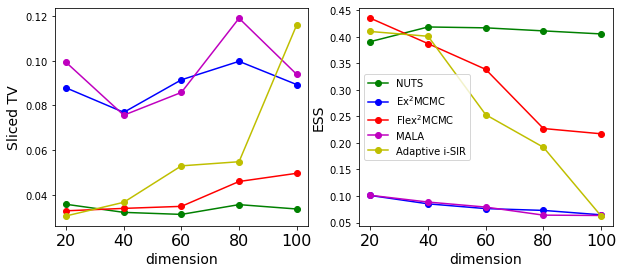

In [110]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
#i-sir plots
#ax[0].plot(np.arange(len(dims)),np.asarray(av_nuts["emd"])/np.asarray(dims),marker="o",c='g',label="NUTS")
#ax[0].plot(np.arange(len(dims)),np.asarray(av_ex2["emd"])/np.asarray(dims),marker="o",c='b',label="Ex$^2$MCMC")
#ax[0].plot(np.arange(len(dims)),np.asarray(av_flex["emd"])/np.asarray(dims),marker="o",c='r',label="Flex$^2$MCMC")
#ax[0].plot(np.arange(len(dims)),np.asarray(av_isir["emd"])/np.asarray(dims),marker="o",c='m',label="MALA")
#ax[0].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["emd"])/np.asarray(dims),marker="o",c='y',label="Adaptive i-SIR")

#ax[0].set_xlabel('dimension',fontsize=14)
#ax[0].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
#ax[0].set_ylabel('EMD',fontsize=14)
#mala samples
ax[0].plot(np.arange(len(dims)),np.asarray(av_nuts["tv"]),marker="o",c='g',label="NUTS")
ax[0].plot(np.arange(len(dims)),np.asarray(av_ex2["tv"]),marker="o",c='b',label="Ex$^2$MCMC")
ax[0].plot(np.arange(len(dims)),np.asarray(av_flex["tv"]),marker="o",c='r',label="Flex$^2$MCMC")
ax[0].plot(np.arange(len(dims)),np.asarray(av_isir["tv"]),marker="o",c='m',label="MALA")
ax[0].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["tv"]),marker="o",c='y',label="Adaptive i-SIR")
#ax[1].fill_between(
#            dims,
#            np.amin(emd_isir/dims,axis=0),
#            np.amax(emd_isir/dims,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[1].fill_between(
#            dims,
#            np.amin(emd_ex2/dims,axis=0),
#            np.amax(emd_ex2/dims,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[1].set_title('EMD distance')
#ax[1].set_xticks(dims,fontsize=14)
ax[0].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[0].set_xlabel('dimension',fontsize=14)
ax[0].set_ylabel('Sliced TV',fontsize=14)
#ex2-mcmc samples
ax[1].plot(np.arange(len(dims)),np.asarray(av_nuts["ess"]),marker="o",c='g',label="NUTS")
ax[1].plot(np.arange(len(dims)),np.asarray(av_ex2["ess"]),marker="o",c='b',label="Ex$^2$MCMC")
ax[1].plot(np.arange(len(dims)),np.asarray(av_flex["ess"]),marker="o",c='r',label="Flex$^2$MCMC")
ax[1].plot(np.arange(len(dims)),np.asarray(av_isir["ess"]),marker="o",c='m',label="MALA")
ax[1].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["ess"]),marker="o",c='y',label="Adaptive i-SIR")
#ax[2].fill_between(
#            dims,
#            np.amin(ess_isir,axis=0),
#            ess_isir.mean(axis=0) + ess_isir.mean(axis=0) - np.amin(ess_isir,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[2].fill_between(
#            dims,
#            np.amin(ess_ex2,axis=0),
#            ess_ex2.mean(axis=0) + ess_ex2.mean(axis=0) - np.amin(ess_ex2,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[2].set_title('EMD')
#ax[2].set_xticks(dims,fontsize=14)
ax[1].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[1].set_xlabel('dimension',fontsize=14)
ax[1].set_ylabel('ESS',fontsize=14)
ax[1].legend(fontsize = 10)
plt.savefig("banana/ess_tv_study.png", format="png", bbox_inches="tight") 
plt.show()